## Text Analysis
 loads and preprocesses the data, identifies specific types of posts, labels the data based on the content of the posts, analyzes the labeled data, and visualizes the results.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [27]:
filepath = "Cleaned data/"
filename = "All_posts.csv"
df = pd.read_csv(filepath + filename)
df.head()

,timestamp,Username,caption,no. of likes,no. of comments,comments
0,30/6/2020,8days_eat,Katong’s famous Hokkien mee and fried mee sua ...,326,7,"['@lauren.khoury still can’t crack a smile 😬',..."
1,30/6/2020,8days_eat,"For the first time in Singapore, Heytea will b...",258,3,"['Awesomeeeee neeed this now', '@becauseitsdon..."
2,29/6/2020,8days_eat,Korean “fat-carons” — supersized macarons stuf...,453,3,['#8dayseat #sgfoodies #instafood #yum #sgfood...
3,29/6/2020,8days_eat,Online ordering system Oddle has launched a ne...,287,3,"['THANK YOU 👀📸🔥', 'Absolutely love this tinkat..."
4,29/6/2020,8days_eat,A canelé is a bite-sized French pastry from Bo...,431,3,"['@jet8food , I see it! 😁', '@brave_nic', '🙏🏼💗💗']"


### Data Pre-processing

In [28]:
numposts = df.shape[0]

In [29]:
df["ID"] = df.index
df["caption"] = df["caption"].apply(lambda x: x.lower())
df.head()

,timestamp,Username,caption,no. of likes,no. of comments,comments,ID
0,30/6/2020,8days_eat,katong’s famous hokkien mee and fried mee sua ...,326,7,"['@lauren.khoury still can’t crack a smile 😬',...",0
1,30/6/2020,8days_eat,"for the first time in singapore, heytea will b...",258,3,"['Awesomeeeee neeed this now', '@becauseitsdon...",1
2,29/6/2020,8days_eat,korean “fat-carons” — supersized macarons stuf...,453,3,['#8dayseat #sgfoodies #instafood #yum #sgfood...,2
3,29/6/2020,8days_eat,online ordering system oddle has launched a ne...,287,3,"['THANK YOU 👀📸🔥', 'Absolutely love this tinkat...",3
4,29/6/2020,8days_eat,a canelé is a bite-sized french pastry from bo...,431,3,"['@jet8food , I see it! 😁', '@brave_nic', '🙏🏼💗💗']",4


In [30]:
giveaway_posts = df[df["caption"].str.contains("giveaway", case=False)]
print(giveaway_posts["caption"])


124    [giveaway closed] win yourself a box of hai ch...
146    [giveaway closed] win yourself a box of hai ch...
216    [giveaway] last evening concludes one of the m...
405    yum cha tonight! are you ready? tonight’s face...
441    [closed] here’s a little something to spice up...
471    [giveaway] there is no better news than hearin...
488    [closed] here’s a little something to spice up...
518    [giveaway] there is no better news than hearin...
541    [giveaway] - snow white & the 7 dwarfs cold br...
645    [giveaway] - i am giving away 3 sets of this p...
657    closed 🥳*giveaway* beautiful shabu set from @m...
707    [new giveaway] [🚇 #stormscapestayhome]\r\nhai ...
743    [new giveaway] [🚇 #stormscapestayhome]\r\nhai ...
758    [new giveaway] [🚇 #stormscapestayhome]\r\nsich...
774    [new giveaway] [🚇 #stormscapestayhome]\r\n8 ty...
Name: caption, dtype: object


### Identifying giveaway posts

In [31]:
df.loc[df["caption"].str.contains("giveaway", case=False), "caption"] = "giveaway"
df.head(125)


,timestamp,Username,caption,no. of likes,no. of comments,comments,ID
0,30/6/2020,8days_eat,katong’s famous hokkien mee and fried mee sua ...,326,7,"['@lauren.khoury still can’t crack a smile 😬',...",0
1,30/6/2020,8days_eat,"for the first time in singapore, heytea will b...",258,3,"['Awesomeeeee neeed this now', '@becauseitsdon...",1
2,29/6/2020,8days_eat,korean “fat-carons” — supersized macarons stuf...,453,3,['#8dayseat #sgfoodies #instafood #yum #sgfood...,2
3,29/6/2020,8days_eat,online ordering system oddle has launched a ne...,287,3,"['THANK YOU 👀📸🔥', 'Absolutely love this tinkat...",3
4,29/6/2020,8days_eat,a canelé is a bite-sized french pastry from bo...,431,3,"['@jet8food , I see it! 😁', '@brave_nic', '🙏🏼💗💗']",4
...,...,...,...,...,...,...,...
120,31/5/2020,danielfooddiary,[closing] the pelican at one fullerton which h...,745,12,['#danielfooddiary #wherewhatwow #singapore #...,120
121,30/5/2020,danielfooddiary,isn’t this the weather for kway chap?\r\n\r\no...,978,10,"['Gotta brave the queues! 😅', '#danielfooddiar...",121
122,30/6/2020,eatbooksg,helmed by the same people behind fatty bom bom...,1359,16,"['Operating timing ~ 11:30am-10pm😊', 'Thank yo...",122
123,29/6/2020,eatbooksg,"tucked away along a quiet lane in novena, this...",800,4,"['@_charmis omg', '🔥❤️😍', '@joreb_ this one HA...",123


In [32]:
def label_from_df_column(df_corpus, name_col, search_col):
    def helper(caption):
        if not caption: # checks if caption is blank
            return
        for i in range(len(df_corpus[search_col])):
            food = df_corpus[search_col][i]
            if food in caption:
                return df_corpus[name_col][i]

        # food not found
        return
    return helper


In [33]:
df_corpus = pd.read_csv(filepath + "/"+ "02_Ingredients.csv")  
df_corpus.head()

,Aliased Ingredient Name,Ingredient Synonyms,Entity ID,Category
0,Egg,egg,0,Meat
1,Bread,bread; bun,2,Bakery
2,Rye Bread,bread-rye,3,Bakery
3,Wheaten Bread,bread-wheaten,4,Bakery
4,White Bread,bread-white; baguette,5,Bakery


In [34]:
df_corpus.shape


(930, 4)

### Labeling the data

In [35]:
df["food"] = df["caption"].apply(label_from_df_column(df_corpus, "Aliased Ingredient Name", "Ingredient Synonyms"))

In [36]:
df["category"] = df["caption"].apply(label_from_df_column(df_corpus, "Category", "Ingredient Synonyms"))  


In [37]:
df.head()

,timestamp,Username,caption,no. of likes,no. of comments,comments,ID,food,category
0,30/6/2020,8days_eat,katong’s famous hokkien mee and fried mee sua ...,326,7,"['@lauren.khoury still can’t crack a smile 😬',...",0,Chia,Herb
1,30/6/2020,8days_eat,"for the first time in singapore, heytea will b...",258,3,"['Awesomeeeee neeed this now', '@becauseitsdon...",1,Rice,Cereal
2,29/6/2020,8days_eat,korean “fat-carons” — supersized macarons stuf...,453,3,['#8dayseat #sgfoodies #instafood #yum #sgfood...,2,Common ling,Fish
3,29/6/2020,8days_eat,online ordering system oddle has launched a ne...,287,3,"['THANK YOU 👀📸🔥', 'Absolutely love this tinkat...",3,Gin,Beverage Alcoholic
4,29/6/2020,8days_eat,a canelé is a bite-sized french pastry from bo...,431,3,"['@jet8food , I see it! 😁', '@brave_nic', '🙏🏼💗💗']",4,Rum,Beverage Alcoholic


In [38]:
df[["caption", "food", "category"]]

,caption,food,category
0,katong’s famous hokkien mee and fried mee sua ...,Chia,Herb
1,"for the first time in singapore, heytea will b...",Rice,Cereal
2,korean “fat-carons” — supersized macarons stuf...,Common ling,Fish
3,online ordering system oddle has launched a ne...,Gin,Beverage Alcoholic
4,a canelé is a bite-sized french pastry from bo...,Rum,Beverage Alcoholic
...,...,...,...
1035,butadon with egg.\r\n\r\nwhen you see shabu sh...,Egg,Meat
1036,here’s a recap of that famous grilled cheese s...,Rum,Beverage Alcoholic
1037,a healthy sunday start with chobani greek yogh...,Oats,Cereal
1038,crispy salmon in vegetable broth.\r\n\r\nthank...,Egg,Meat


In [39]:
df[~df["food"].isna()]

,timestamp,Username,caption,no. of likes,no. of comments,comments,ID,food,category
0,30/6/2020,8days_eat,katong’s famous hokkien mee and fried mee sua ...,326,7,"['@lauren.khoury still can’t crack a smile 😬',...",0,Chia,Herb
1,30/6/2020,8days_eat,"for the first time in singapore, heytea will b...",258,3,"['Awesomeeeee neeed this now', '@becauseitsdon...",1,Rice,Cereal
2,29/6/2020,8days_eat,korean “fat-carons” — supersized macarons stuf...,453,3,['#8dayseat #sgfoodies #instafood #yum #sgfood...,2,Common ling,Fish
3,29/6/2020,8days_eat,online ordering system oddle has launched a ne...,287,3,"['THANK YOU 👀📸🔥', 'Absolutely love this tinkat...",3,Gin,Beverage Alcoholic
4,29/6/2020,8days_eat,a canelé is a bite-sized french pastry from bo...,431,3,"['@jet8food , I see it! 😁', '@brave_nic', '🙏🏼💗💗']",4,Rum,Beverage Alcoholic
...,...,...,...,...,...,...,...,...,...
1035,31/5/2020,thesilverchef,butadon with egg.\r\n\r\nwhen you see shabu sh...,1192,18,"['Yum yum in my tum 😍', 'Can you use beef inst...",1035,Egg,Meat
1036,31/5/2020,thesilverchef,here’s a recap of that famous grilled cheese s...,435,4,['🙋🏻\u200d♀️🙋🏻\u200d♀️🙋🏻\u200d♀️🙋🏻\u200d♀️🙋🏻\u...,1036,Rum,Beverage Alcoholic
1037,31/5/2020,thesilverchef,a healthy sunday start with chobani greek yogh...,353,0,[],1037,Oats,Cereal
1038,30/5/2020,thesilverchef,crispy salmon in vegetable broth.\r\n\r\nthank...,461,4,"['That skin looks🔥', 'Yummmm😋😋😋', '😘😘😘']",1038,Egg,Meat


### Analyzing the data

In [40]:
print(df["food"].unique())
print(df["food"].nunique())

['Chia' 'Rice' 'Common ling' 'Gin' 'Rum' 'Coffee' 'Egg' 'Durian' 'Sugar'
 'Tea' 'Wine' None 'Chicken' 'Malt' 'Banana' 'Cheese' 'Fir' 'Wort'
 'Wild boar' 'Fig' 'Oats' 'Agar' 'Strawberry' 'Great horned owl' 'Chard'
 'Sesame' 'Butter' 'Green turtle' 'Milk' 'Peas' 'Clam' 'Pear' 'Ham'
 'Barley' 'Meat' 'Mandarin Orange' 'Sage' 'Pine' 'Avocado' 'Prawn' 'Pie'
 'Cake' 'Yam' 'Vodka' 'Pasta' 'Cocktail' 'Peanut' 'Sake' 'Vinegar'
 'Cinnamon' 'Melon' 'Dates' 'Lime' 'Grass' 'Pizza' 'Soup' 'Oyster' 'Tofu'
 'Lovage' 'Carrot' 'Orange' 'Ice cream' 'Onion' 'Cider' 'Walnut' 'Shrimp'
 'Tomato' 'Garlic' 'Lemon' 'Truffle' 'Almond' 'Apple' 'Beans'
 'Striped bass' 'Rose' 'Champagne' 'Mountain hare' 'Lotus' 'Cherry'
 'Tortilla' 'Watercress' 'Scallop' 'Citrus Fruits']
82


In [41]:
print(df["category"].unique())
print(df["category"].nunique())


['Herb' 'Cereal' 'Fish' 'Beverage Alcoholic' 'Beverage' 'Meat' 'Fruit'
 'Additive' 'Plant' None 'Dairy' 'Essential Oil' 'Vegetable' 'Nuts & Seed'
 'Legume' 'Seafood' 'Dish' 'Bakery' 'Spice' 'Fungus' 'Flower']
20


Verifying Representation of each Influencer

In [42]:
df_influencers = df["Username"].value_counts().reset_index()
df_influencers.columns = ["Username", "no. of posts"]
df_influencers["no. of labelled posts"] = df[~df["food"].isna()]["Username"].value_counts().values
df_influencers["representation %"] = df_influencers["no. of labelled posts"] / df_influencers["no. of posts"] *100

df_influencers

,Username,no. of posts,no. of labelled posts,representation %
0,thesilverchef,251,242,96.414343
1,sgfoodonfoot,122,109,89.344262
2,stormscape,105,97,92.380952
3,fundamentally_flawed,98,93,94.897959
4,sethluicious,94,86,91.489362
5,misstamchiak,79,61,77.215190
6,8days_eat,68,61,89.705882
7,danielfooddiary,54,51,94.444444
8,foodkingnoc,48,43,89.583333
9,ieatishootipost,47,42,89.361702


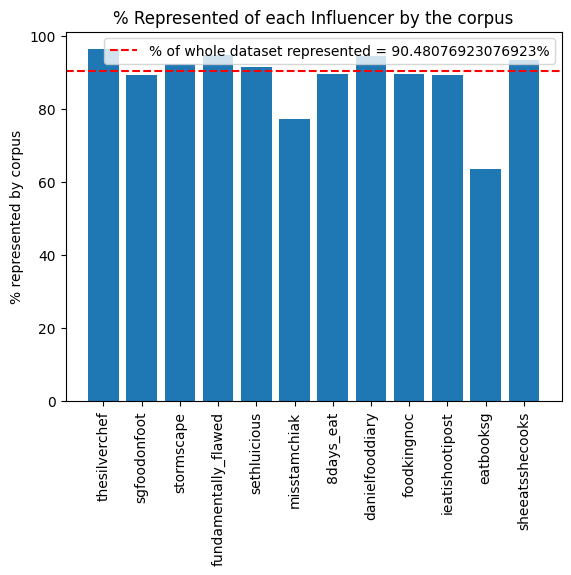

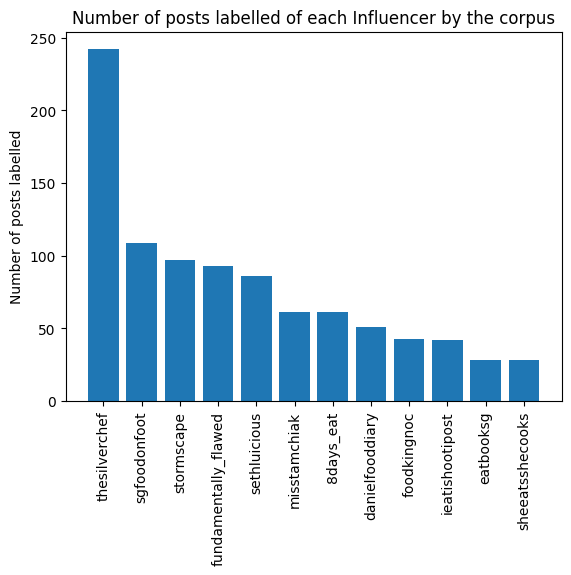

In [43]:
plt.bar(df_influencers["Username"], df_influencers["representation %"])
plt.axhline(len(df[~df["food"].isna()])/len(df)*100, color="r",\
            label="% of whole dataset represented = "+str(len(df[~df["food"].isna()])/len(df)*100)+"%", ls='--')
plt.title("% Represented of each Influencer by the corpus")
plt.xticks(rotation=90)
plt.ylabel("% represented by corpus")
plt.legend()
plt.show()

plt.bar(df_influencers["Username"], df_influencers["no. of labelled posts"])
plt.title("Number of posts labelled of each Influencer by the corpus")
plt.xticks(rotation=90)
plt.ylabel("Number of posts labelled")
plt.show()

### Creating a word frequency

In [23]:
wordlist = []
wordfreq = []

# Get a list of the words in the "food" column
food_list = df["food"].dropna().values.tolist()  # dropna() is used to ignore any NaN values

for c in food_list:
    wordlist += c.split()

unique_wordlist = list(set(wordlist))
    
for w in unique_wordlist:
    wordfreq.append(wordlist.count(w))
    
df_wordsfreq = pd.DataFrame({"word": unique_wordlist,
                             "freq": wordfreq})
df_wordsfreq.sort_values("freq", ascending = False)[:20]


,word,freq
82,Egg,217
75,Gin,95
25,Rice,91
7,Butter,52
32,Cheese,47
63,Oats,35
57,Milk,29
20,Tea,26
0,Wort,24
71,Wine,22


In [24]:
df_wordsfreq.describe()


,freq
count,91.000000
mean,10.802198
std,27.009554
min,1.000000
25%,2.000000
50%,3.000000
75%,7.500000
max,217.000000


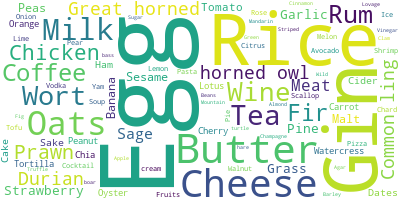

In [54]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(food_list)

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [55]:
df_wordsfreq = pd.DataFrame({"word": list(wordcloud.words_.keys()),
                            "freq": list(wordcloud.words_.values())})
df_wordsfreq.sort_values("freq", ascending = False)[:20]

,word,freq
0,Egg,1.000000
1,Gin,0.437788
2,Rice,0.419355
3,Butter,0.239631
4,Cheese,0.216590
5,Oats,0.161290
6,Milk,0.133641
7,Tea,0.119816
8,Wort,0.110599
9,Wine,0.101382
